In [214]:
# Add needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Models and modeling tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Change inline plots default size
plt.rcParams['figure.figsize'] = [12, 8]

## Data description: ##
We are one of the fastest growing startups in the logistics and delivery domain. 
We work with several partners and make on-demand delivery to our customers. 
During the COVID-19 pandemic, we are facing several different challenges and everyday 
we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion 
strategy we know that we need to make our customers happy and the only way to do that 
is to measure how happy each customer is. If we can predict what makes our customers 
happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant 
feedback from our customers. This is a crucial function to improve our operations 
across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset 
of this data. We will be using the remaining data as a private test set.

- Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
- X1 = my order was delivered on time
- X2 = contents of my order was as I expected
- X3 = I ordered everything I wanted to order
- X4 = I paid a good price for my order
- X5 = I am satisfied with my courier
- X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 
1 to 5 where the smaller number indicates less and the higher number indicates more 
towards the answer.

## Analysis Summary: ##



<font size="3" >
    
Survey data was collected from a customer cohort and responses were used to develop a model to determine what aspects of the ordering and delivery process were most likely to lead to customer happiness. The model suggests the most important characteristics leading to customer happiness were `Find Everything Customer Wanted` (30.3%) and `On Time Delivery` (27.3%).

The clearest story in the sample data was for `On Time Delivery`, where 65% of Happy respondents gave a 5/5 rating compared to only 35% of Unhappy respondents.  For `Find Everything Customer Wanted`, 48% of Happy respondents rated it 4/5 or above, compared to 30% of Unhappy respondents.

This suggests that to improve customer satisfaction, business development and investment should be focused on improving On Time Delivery and expanding inventory/partnerships to increase the likelihood a customer is able to find the products they are looking for.

The model, which uses survey responses on `On Time Delivery`, `Find Everything Customer Wanted`, `Good Prices` and `Easy to Use App`, provides about 70% accuracy in predicting the happiness of the customer.  A small survey sample size may be limiting the potential accuracy of the model, as well as the types of analysis available and thus for future surveys, depending on costs, larger samples would ideally be prioritized.

The analysis excluded two survey responses after initial data exploration, `Customer Order was as Expected` and `Delivery Satisfaction`.  `Customer Order was as Expected` showed the weakest relationship with customer happiness and the exclusion of `Delivery Satisfaction` was determined to lead to the largest improvement in model accuracy when dropped along with `Customer Order was as Expected`.

A potentially concerning insight from the sample data was that `Customer Order was as Expected` had the lowest average rating at only 2.53/5.  While the relationship of this survey response was weak with customer happiness in the sample data, one hypothesis is that since it appears that customers are not typically receiving what they expect, this characteristic isn't informative of their happiness.  Intuition would suggest that receiving what you would expect to receive should be important.  Future surveys may want to investigate this further, through additional questions, to better understand why customers are providing low ratings for `Customer Order was as Expected`.


## Final Model: ##

In [215]:
# Read in the rawData
columns = ['Happy', 'OnTime', 'OrderCorrect', 'FoundEverything', 'GoodPrice', 'DeliverySatisfaction', 'EasyToUse']
rawData = pd.read_csv('ACME-HappinessSurvey2020.csv', header=0, names=columns)

selectedColumns = ['OnTime', 'FoundEverything', 'GoodPrice', 'EasyToUse']

# Separate data in independent (features) and dependent (target) datasets
# Exclude 'OrderCorrect' and 'DeliverySatisfaction' from features due to poor performance
x_train = rawData[selectedColumns]
y_train = rawData[['Happy']]

clf = RandomForestClassifier(max_depth=9, min_samples_split=2, min_samples_leaf=1, random_state=0)
clf = clf.fit(x_train, np.ravel(y_train))


###########################
#### Add test set here ####
###########################
## testData = pd.read_csv('', header=0, names=columns)

## x_test = testData[selectedColumns]
## y_test = testData[['Happy']]
## y_predict = clf.predict(x_test)
## accScore = accuracy_score(y_test, y_predict)
## print (f'The accuracy score on the test set is {round(accScore,4)*100}%')

In [216]:
# Evaluate model performance
scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=5)
print (f'The mean cross-validation score is {round(scores.mean(),4)*100}%')
print ()

# Evaluate feature importance
clf = clf.fit(x_final, np.ravel(y_final))
importances = pd.Series(clf.feature_importances_, index=[selectedColumns])
print ('Mean decrease in impurity importances:')
print (importances.sort_values(ascending=False))

The mean cross-validation score is 69.94%

Mean decrease in impurity importances:
FoundEverything    0.303340
OnTime             0.273281
EasyToUse          0.212277
GoodPrice          0.211101
dtype: float64


## Work: ##

### Exploratory Data Analysis ###

In [217]:
# Read in the rawData
columns = ['Happy', 'OnTime', 'OrderCorrect', 'FoundEverything', 'GoodPrice', 'DeliverySatisfaction', 'EasyToUse']
rawData = pd.read_csv('ACME-HappinessSurvey2020.csv', header=0, names=columns)

selectedColumns = ['OnTime', 'OrderCorrect', 'FoundEverything', 'GoodPrice', 'DeliverySatisfaction', 'EasyToUse']

# Separate data in independent (features) and dependent (target) datasets
x_train = rawData[selectedColumns]
y_train = rawData[['Happy']]

rawData.describe()

,Happy,OnTime,OrderCorrect,FoundEverything,GoodPrice,DeliverySatisfaction,EasyToUse
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


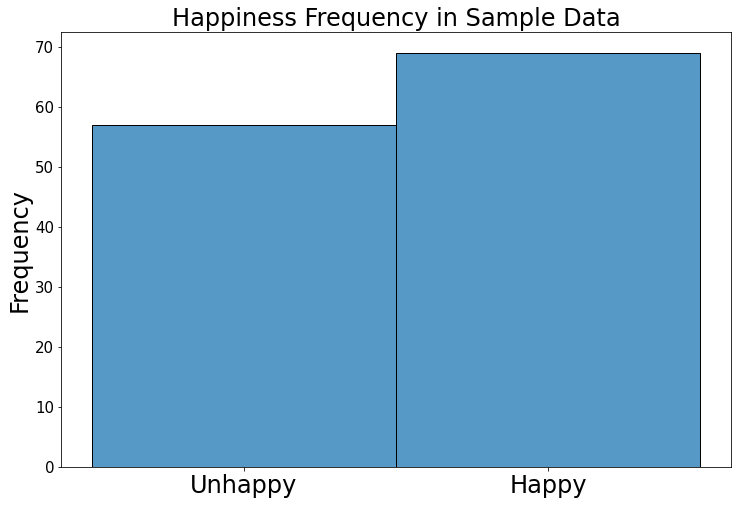

In [218]:
# Check if target is balanced
fig, axs = plt.subplots()
sns.histplot(data=rawData, x='Happy', discrete=True)
axs.set_xticks([0,1])
axs.set_xticklabels(['Unhappy', 'Happy'], fontsize=24)
plt.xlabel('')
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=24)
plt.title('Happiness Frequency in Sample Data', fontsize=24)
plt.show()

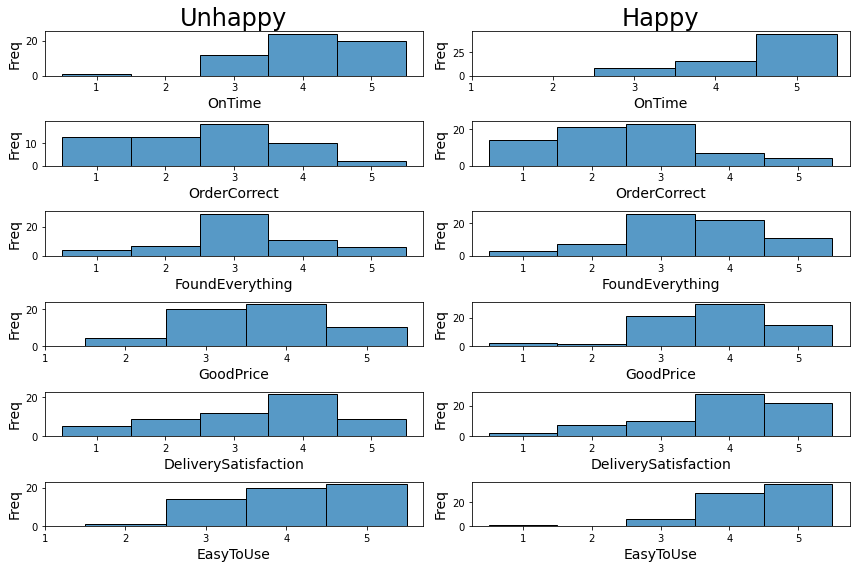

In [219]:
# Look at distributions against happy/unhappy for initial intuition
happy = rawData.loc[rawData.Happy == 1]
unhappy = rawData.loc[rawData.Happy == 0]

fig, axs = plt.subplots(6,2)
sns.histplot(data=unhappy, x='OnTime', ax=axs[0,0], discrete=True)
sns.histplot(data=unhappy, x='OrderCorrect', ax=axs[1,0], discrete=True)
sns.histplot(data=unhappy, x='FoundEverything', ax=axs[2,0], discrete=True)
sns.histplot(data=unhappy, x='GoodPrice', ax=axs[3,0], discrete=True)
sns.histplot(data=unhappy, x='DeliverySatisfaction', ax=axs[4,0], discrete=True)
sns.histplot(data=unhappy, x='EasyToUse', ax=axs[5,0], discrete=True)

sns.histplot(data=happy, x='OnTime', ax=axs[0,1], discrete=True)
sns.histplot(data=happy, x='OrderCorrect', ax=axs[1,1], discrete=True)
sns.histplot(data=happy, x='FoundEverything', ax=axs[2,1], discrete=True)
sns.histplot(data=happy, x='GoodPrice', ax=axs[3,1], discrete=True)
sns.histplot(data=happy, x='DeliverySatisfaction', ax=axs[4,1], discrete=True)
sns.histplot(data=happy, x='EasyToUse', ax=axs[5,1], discrete=True)

#plt.xlabel(fontsize=24)
#plt.yticks(fontsize=15)
#plt.ylabel('Frequency', fontsize=24)

axs[0,0].set_title('Unhappy',fontsize=24)
axs[0,1].set_title('Happy',fontsize=24)

for i in range(0,6):
    for j in range(0,2):
        axs[i,j].set_ylabel('Freq', fontsize=14)
        axs[i,j].xaxis.get_label().set_fontsize(14)
        axs[i,j].set_xticks([1,2,3,4,5])

plt.tight_layout()
plt.show()

In [220]:
## Look at Mutual Information metric to assess weak relationships between features and target
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y, discrete_features=True)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x_train, np.ravel(y_train))
display (mi_scores)

OnTime                  0.049705
EasyToUse               0.035543
DeliverySatisfaction    0.027627
GoodPrice               0.021880
FoundEverything         0.017432
OrderCorrect            0.009468
Name: MI Scores, dtype: float64

### Discussion on Features

__Initial thoughts__ 
- Balanced Binary response variable 
- Very small dataset
- Predictors are survey data and all on same scale so shouldn't need normalization

__Shape__
- Most of the data is slightly left skewed
- Overall skewness does not seem like a concern

__Multicollinearity__
- High correlations between features which is not surprising as someone who had a positive experience will tend to fill out more positive scores and those with a negative experience will tend to fill out more negative scores
- Selecting a subset of features will be the best approach to try to address realtionships between features 
- Non-parametric approaches like Decision Tree methods may be the best approach

__Feature Selections__
- `OnTime` and `EasyToUse` top the MI metric, though all seem low in general, with `OnTime`'s relationship between happiness also apparent graphically
- `OrderCorrect` does not seem to have much predictive power
- `DeliverySatisfaction` and `FoundEverything` and `GoodPrice`'s relationships with happiness are hard to differentiate graphically and are in the middle of the pack relatively for MI scores
- Overall, `OnTime` and `EasyToUse` seem most important to prediction of overall Happiness

__Other Comments__
- `OrderCorrect` is concerning, seems to have little predictive power, but has an average of only 2.5 (low compared to all the other categories).  This would imply that many people are not getting what they expected, yet seems to not be important to their overall happiness, which is counter-intuitive.  I would suggest looking into the source of that data further for possible issues.  If the data is valid, despite not being a current customer concern, seems like something that should be investigated further internally.

### Statistical Tests ###

In [221]:
# Calculate pVal for comparison of proportion of ratings >= some cutoff value in the happy vs unhappy subsets
# H0: No difference in proportions of <cutoff>/5 ratings for `<var>` between Happy and Unhappy customers
# H1: Proportion of <cutoff>/5 ratings for `<var>` is larger for Happy than Unhappy customers
# Assumptions: p0*n0, (1-p0)*n0, p1*n1, (1-p1)*n1 > 5

def compareProportions(dataset, var, cutoff):
    happy = dataset.loc[dataset.Happy == 1]
    unhappy = dataset.loc[dataset.Happy == 0]
    
    # Sample sizes in each subset
    n0 = happy.Happy.count()
    n1 = unhappy.Happy.count()
    
    # Calculate proportion of ratings greater than or equal to cutoff value
    # for happy customers (p0) and unhappy customers (p1)
    p0 = happy.loc[happy[var] >= cutoff].Happy.count() / happy.Happy.count()
    p1 = unhappy.loc[unhappy[var] >= cutoff].Happy.count() / unhappy.Happy.count()
    
    # Calculate overall proportion of ratings greater than or equal to cutoff value
    p = dataset.loc[dataset[var] >= cutoff].Happy.count() / dataset.Happy.count()
    
    # Calculate Z test statistic for comparison of two proportions
    Z = (p0 - p1) / np.sqrt(p*(1-p)*(1/n0 + 1/n1))
    
    # Calculate 1-sided pValue
    pVal = stats.norm.sf(Z)
    
    # Check assumptions
    assumption = 'Invalid'
    if ((n0*p0 > 5) and (n0*(1-p0) > 5) and (n1*p1 > 5) and (n1*(1-p1) > 5)):
        assumption = 'Valid'
    
    # Return result
    if (assumption == 'Valid'):
        return [pVal, assumption, p0, p1]
    else:
        return [pVal, assumption, -1, -1]

def printResult(output, var, cutoff):
    if (cutoff == 5):
        print (f'`{var}` with a {cutoff}/5 rating had a p-value of {output[0]*100:.2f}% with a happy/unhappy sample proportion of {output[2]*100:.2f}%/{output[3]*100:.2f}%')
    else:
        print (f'`{var}` with a {cutoff}+/5 rating had a p-value of {output[0]*100:.2f}% with a happy/unhappy sample proportion of {output[2]*100:.2f}%/{output[3]*100:.2f}%')

In [222]:
# OnTime rating of 5/5
onTime5 = compareProportions(rawData, 'OnTime', 5)
onTime4 = compareProportions(rawData, 'OnTime', 4)

# FoundEverything rating of 5/5 and 4/5
foundEverything5 = compareProportions(rawData, 'FoundEverything', 5)
foundEverything4 = compareProportions(rawData, 'FoundEverything', 4)

# GoodPrice rating of 5/5 and 4/5
goodPrice5 = compareProportions(rawData, 'GoodPrice', 5)
goodPrice4 = compareProportions(rawData, 'GoodPrice', 4)

# EasyToUse rating of 5/5 and 4/5
easyToUse5 = compareProportions(rawData, 'EasyToUse', 5)
easyToUse4 = compareProportions(rawData, 'EasyToUse', 4)

# DeliverySatisfaction rating of 5/5 and 4/5
deliverySatisfaction5 = compareProportions(rawData, 'DeliverySatisfaction', 5)
deliverySatisfaction4 = compareProportions(rawData, 'DeliverySatisfaction', 4)

# OrderCorrect rating of 5/5 and 4/5
orderCorrect5 = compareProportions(rawData, 'OrderCorrect', 5)
orderCorrect4 = compareProportions(rawData, 'OrderCorrect', 4)
orderCorrect3 = compareProportions(rawData, 'OrderCorrect', 3)

# Examine results
printResult(onTime5, 'OnTime', 5)
printResult(onTime4, 'OnTime', 4)
print()
printResult(foundEverything5, 'FoundEverything', 5)
printResult(foundEverything4, 'FoundEverything', 4)
print()
printResult(goodPrice5, 'GoodPrice', 5)
printResult(goodPrice4, 'GoodPrice', 4)
print()
printResult(easyToUse5, 'EasyToUse', 5)
printResult(easyToUse4, 'EasyToUse', 4)
print()
printResult(deliverySatisfaction5, 'DeliverySatisfaction', 5)
printResult(deliverySatisfaction4, 'DeliverySatisfaction', 4)
print()
printResult(orderCorrect5, 'OrderCorrect', 5)
printResult(orderCorrect4, 'OrderCorrect', 4)
printResult(orderCorrect3, 'OrderCorrect', 3)

`OnTime` with a 5/5 rating had a p-value of 0.04% with a happy/unhappy sample proportion of 65.22%/35.09%
`OnTime` with a 4+/5 rating had a p-value of 4.64% with a happy/unhappy sample proportion of 88.41%/77.19%

`FoundEverything` with a 5/5 rating had a p-value of 18.79% with a happy/unhappy sample proportion of 15.94%/10.53%
`FoundEverything` with a 4+/5 rating had a p-value of 1.99% with a happy/unhappy sample proportion of 47.83%/29.82%

`GoodPrice` with a 5/5 rating had a p-value of 27.84% with a happy/unhappy sample proportion of 21.74%/17.54%
`GoodPrice` with a 4+/5 rating had a p-value of 19.98% with a happy/unhappy sample proportion of 65.22%/57.89%

`EasyToUse` with a 5/5 rating had a p-value of 8.67% with a happy/unhappy sample proportion of 50.72%/38.60%
`EasyToUse` with a 4+/5 rating had a p-value of 0.87% with a happy/unhappy sample proportion of 89.86%/73.68%

`DeliverySatisfaction` with a 5/5 rating had a p-value of 1.84% with a happy/unhappy sample proportion of 31.88

### Hyperparameter Tuning ###

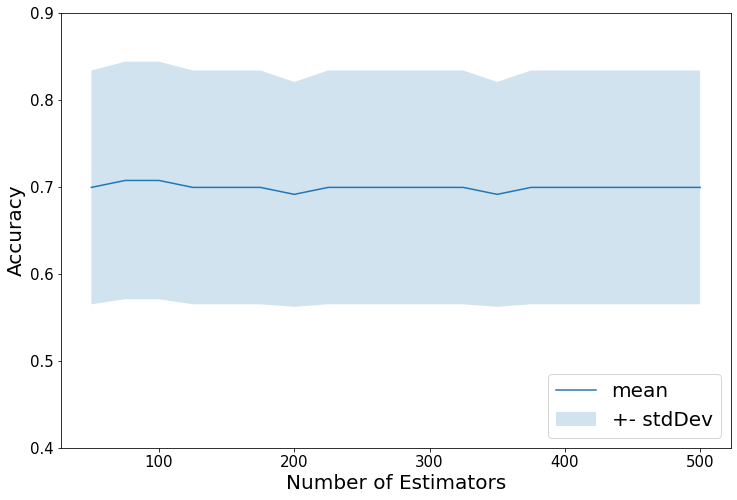

In [223]:
## Num Estimators Param Search ##
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 19)]
results = []
for nest in n_estimators:
    clf = RandomForestClassifier(n_estimators=nest, random_state=100)
    scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=StratifiedKFold(5))
    results.append([nest, scores.mean(), scores.std()])

results = np.array(results)

# Plot Number of Estimators Hyperparameter search results
plt.plot(results[:,0],results[:,1],label='mean')
plt.fill_between(results[:,0],results[:,1]+results[:,2],results[:,1]-results[:,2],alpha=0.2,label='+- stdDev')
plt.ylim([0.40,0.90])
plt.legend(loc='lower right',fontsize=20)
plt.xlabel('Number of Estimators',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Accuracy', fontsize=20)
plt.show()

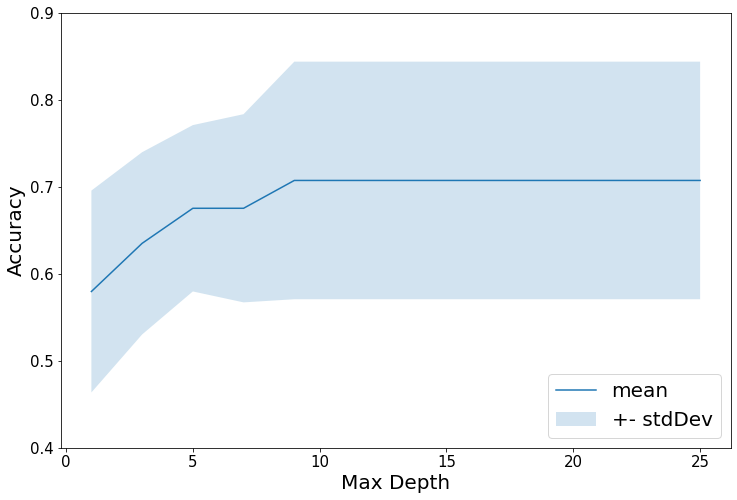

In [224]:
## Max Depth Samples Leaf Param Search ##
max_depth = [int(x) for x in np.linspace(1, 25, num = 13)]
results = []
for md in max_depth:
    # Num estimators doesn't matter, so use default
    clf = RandomForestClassifier(max_depth=md, random_state=100)
    scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=5)
    results.append([md, scores.mean(), scores.std()])
  
results = np.array(results)

# Plot Max Depth Hyperparameter search results
plt.plot(results[:,0],results[:,1],label='mean')
plt.fill_between(results[:,0],results[:,1]+results[:,2],results[:,1]-results[:,2],alpha=0.2,label='+- stdDev')
plt.ylim([0.40,0.90])
plt.legend(loc='lower right',fontsize=20)
plt.xlabel('Max Depth',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Accuracy', fontsize=20)
plt.show()

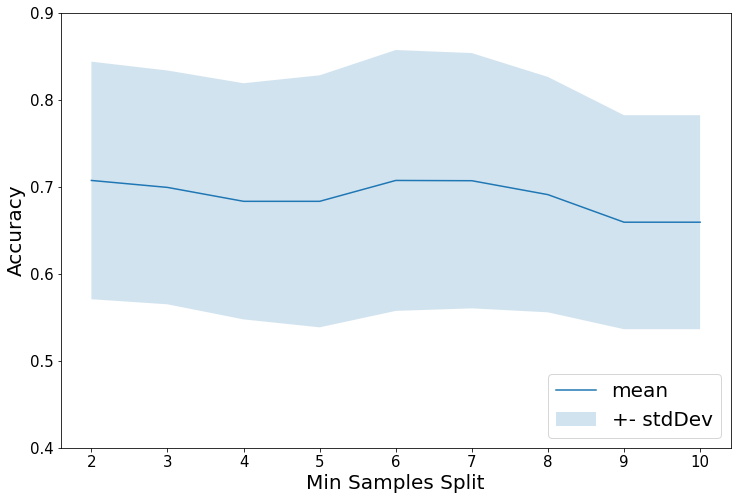

In [225]:
## Min Samples Split Param Search ##
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10]
results = []
for mss in min_samples_split:
    # Max_depth=9 is best choice (smallest value before accuracy levels off)
    clf = RandomForestClassifier(max_depth=9, min_samples_split=mss, random_state=100)
    scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=5)
    results.append([mss, scores.mean(), scores.std()])
  
results = np.array(results)

# Plot Min Samples Split Hyperparameter search results
plt.plot(results[:,0],results[:,1],label='mean')
plt.fill_between(results[:,0],results[:,1]+results[:,2],results[:,1]-results[:,2],alpha=0.2,label='+- stdDev')
plt.ylim([0.40,0.90])
plt.legend(loc='lower right',fontsize=20)
plt.xlabel('Min Samples Split',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Accuracy', fontsize=20)
plt.show()

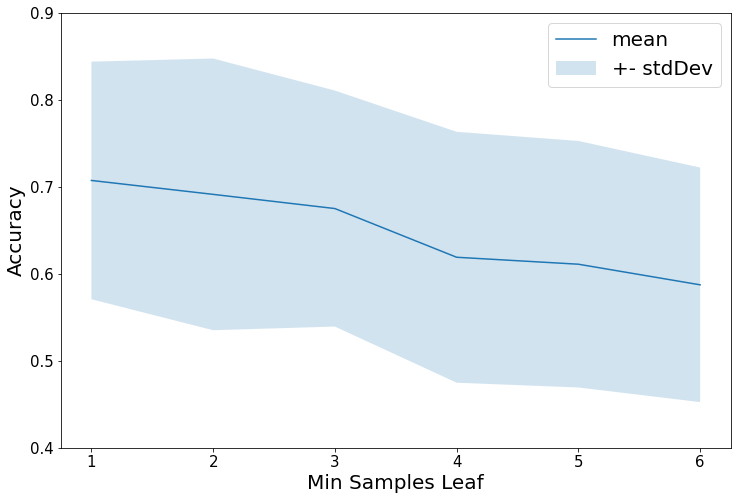

In [226]:
## Min Samples Leaf Param Search ##
min_samples_leaf = [1, 2, 3, 4, 5, 6]
results = []
for msl in min_samples_leaf:
    # MinSamplesSplit=2 seems like best choice (doesn't seem to matter until higher values)
    clf = RandomForestClassifier(max_depth=9, min_samples_split=2, min_samples_leaf=msl, random_state=100)
    scores = cross_val_score(clf, x_final, np.ravel(y_final), cv=5)
    results.append([msl, scores.mean(), scores.std()])
    
results = np.array(results)

# Plot Min Samples Leaf Hyperparameter search results
plt.plot(results[:,0],results[:,1],label='mean')
plt.fill_between(results[:,0],results[:,1]+results[:,2],results[:,1]-results[:,2],alpha=0.2,label='+- stdDev')
plt.ylim([0.40,0.90])
plt.legend(loc='upper right',fontsize=20)
plt.xlabel('Min Samples Leaf',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Accuracy', fontsize=20)
plt.show()